<a href="https://colab.research.google.com/github/iausteenlova/Machine_learning-Practice/blob/master/irangers1%5Bflop%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L&T FS Hackathon


In [1]:
from google.colab import drive
drive.mount('/gdrive')
import glob

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import math

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

**Load data**

In [0]:
path = '/gdrive/My Drive/LTFS/train_LTFS.csv'
data = pd.read_csv(path,parse_dates=['application_date'],index_col='application_date')
df = data.copy()

In [7]:
df.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [8]:
df.shape

(80402, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80402 entries, 2017-04-01 to 2019-07-23
Data columns (total 5 columns):
segment       80402 non-null int64
branch_id     66898 non-null float64
state         80402 non-null object
zone          66898 non-null object
case_count    80402 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [10]:
df.isna().sum()

segment           0
branch_id     13504
state             0
zone          13504
case_count        0
dtype: int64

In [17]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('**'*12)

segment
1    66898
2    13504
Name: segment, dtype: int64
************************
branch_id
159.0    806
29.0     806
67.0     806
269.0    806
74.0     806
        ... 
101.0    806
61.0     806
5.0      806
72.0     806
1.0      806
Name: branch_id, Length: 83, dtype: int64
************************
state
MAHARASHTRA       11322
WEST BENGAL        7292
GUJARAT            7292
UTTAR PRADESH      6486
TAMIL NADU         6486
PUNJAB             4874
ANDHRA PRADESH     4836
HARYANA            4068
ASSAM              4068
ORISSA             3262
BIHAR              3262
KARNATAKA          3262
JHARKHAND          2456
TRIPURA            2456
CHHATTISGARH       1650
MADHYA PRADESH     1650
KERALA             1650
TELANGANA          1612
UTTARAKHAND        1612
DELHI               806
Name: state, dtype: int64
************************
zone
EAST       21762
SOUTH      18538
WEST       16926
NORTH       8060
CENTRAL     1612
Name: zone, dtype: int64
************************
case_count
0.0      

In [22]:
df.tail()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2019-07-19,2,NaN,WEST BENGAL,NaN,1886.0
2019-07-20,2,NaN,WEST BENGAL,NaN,1480.0
2019-07-21,2,NaN,WEST BENGAL,NaN,1028.0
2019-07-22,2,NaN,WEST BENGAL,NaN,1946.0
2019-07-23,2,NaN,WEST BENGAL,NaN,1984.0


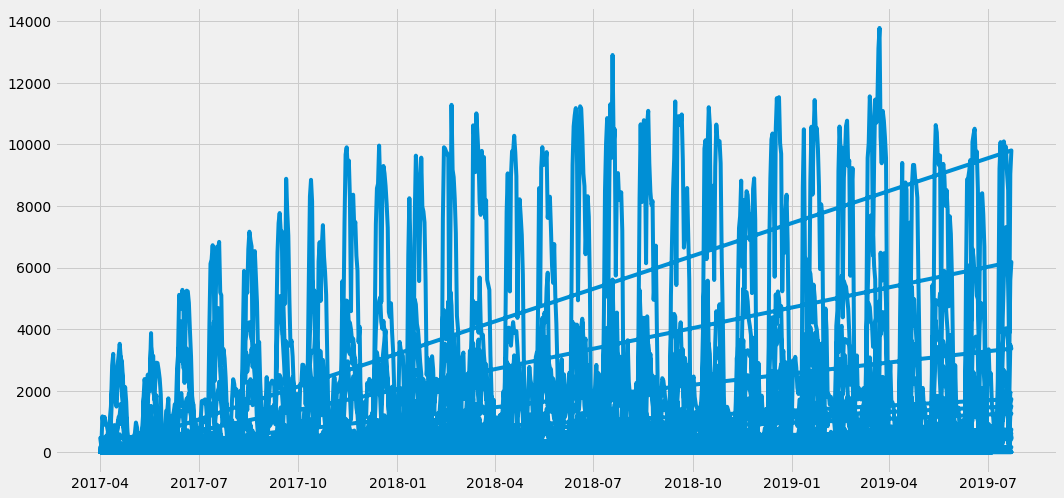

In [27]:
plt.figure(figsize=(16,8))
plt.plot(df['case_count'])

In [30]:
df1 = df.filter(['case_count']) #creating the dataframe using only one column
dataset = df1.values #converting the data into numpy array values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

64322

In [31]:
#scale the data using minmax scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00290128],
       [0.00036266],
       [0.00029013],
       ...,
       [0.07456299],
       [0.14114746],
       [0.14390368]])

In [33]:
# Creating the training dataset (scaled data)
training_data = scaled_data[0:training_data_len,:]

training_data

array([[0.00290128],
       [0.00036266],
       [0.00029013],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [0]:
# split the data into xtrain and ytrain
xt,yt = [],[]

for i in range(90,len(training_data)):
  xt.append(training_data[i-90:i,0])
  yt.append(training_data[i,0])

In [0]:
# converting the xt and yt into arrays
xt = np.array(xt)
yt = np.array(yt)

In [0]:
# reshaping the data for our model
xt = np.reshape(xt,(xt.shape[0],xt.shape[1],1))

In [62]:
xt.shape

(64232, 90, 1)

**Building the model**

In [63]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (xt.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [64]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [66]:
model.fit(xt,yt,batch_size=5,epochs=1)

Epoch 1/1
64232/64232 [==============================] - 1720s 27ms/step - loss: 1.2484e-05


In [0]:
#Create the testing data set
test_data = scaled_data[training_data_len - 90:,:]
#creating XT,YT
XT = []
YT = dataset[training_data_len:,:]
for i in range(90,len(test_data)):
  XT.append(test_data[i-90:i,0])

In [0]:
XT = np.array(XT)

In [72]:
XT.shape

(16080, 90)

In [0]:
XT = np.reshape(XT,(XT.shape[0],XT.shape[1],1))

In [0]:
#Get the models predicted price values 
predictions = model.predict(XT)
predictions = scaler.inverse_transform(predictions)

In [0]:
from sklearn.metrics import mean_squared_error

In [77]:
mean_squared_error(YT,predictions)

1431084.69745183

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


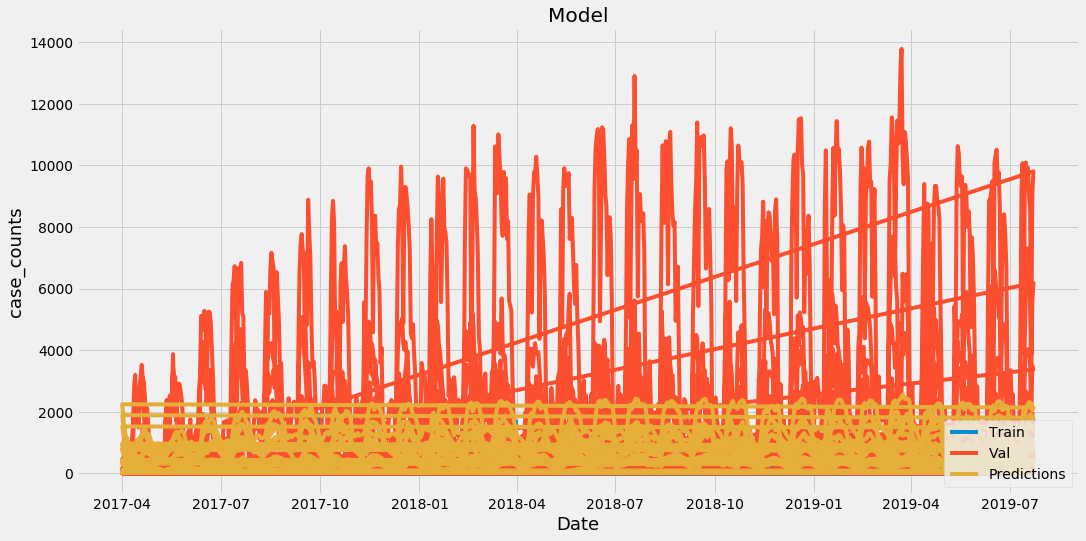

In [78]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('case_counts', fontsize=18)
plt.plot(train['case_count'])
plt.plot(valid[['case_count', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()